TASK-2 : MOVIE RATING PREDICTION

Author: Vamshi Krishna

Batch: July

Domain: Data Science

IMPORTING IMPORTANT LIBRARIES

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

MOVIE DATA

DOWNLOADING DATASET

In [74]:
movie=pd.read_csv('Movies_India.csv')
movie.dropna(inplace=True)
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [70]:
movie.shape

(5659, 10)

In [72]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [78]:
movie.describe()

,Year,Rating
count,5659.000000,5659.000000
mean,-1996.247570,5.898533
std,19.741839,1.381165
min,-2021.000000,1.100000
25%,-2013.000000,5.000000
50%,-2002.000000,6.100000
75%,-1983.000000,6.900000
max,-1931.000000,10.000000


In [80]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


In [82]:
movie.shape

(5659, 10)

In [88]:
movie.Year.unique()

array([-2019., -1997., -2005., -2012., -2014., -2004., -2016., -1991.,
       -2018., -2010., -1958., -2021., -2017., -2009., -1993., -2002.,
       -2008., -1994., -2007., -2003., -1998., -1979., -1974., -2015.,
       -2006., -1981., -2020., -1985., -2013., -2011., -1988., -1987.,
       -1999., -1973., -1968., -1982., -1977., -1950., -1969., -1948.,
       -1990., -1989., -2001., -2000., -1953., -1978., -1963., -1992.,
       -1976., -1984., -1986., -1966., -1975., -1980., -1967., -1970.,
       -1952., -1972., -1971., -1964., -1954., -1962., -1957., -1965.,
       -1996., -1995., -1956., -1955., -1936., -1983., -1951., -1961.,
       -1959., -1949., -1960., -1946., -1940., -1945., -1938., -1941.,
       -1942., -1935., -1937., -1947., -1931., -1933., -1943., -1944.,
       -1932., -1939., -1934.])

In [92]:
movie.Rating.unique()

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  4.5,  6.4,  4.1,  4.8,  8.1,
        5.5,  6.8,  5. ,  6.1,  7.7,  5.1,  3.3,  7.8,  8.4,  4.3,  5.8,
        7.5,  3.6,  4.6,  4.2,  5.3,  5.4,  3. ,  8. ,  6. ,  3.1,  3.8,
        7.9,  2.7,  2.4,  7.6,  6.7,  3.4,  5.2,  4.9,  2.8,  3.7,  3.9,
        3.2,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.5,  2.3,  8.5,
        8.6,  2.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.4,  9.7,  1.8,  9.2,
        2. ,  9.1, 10. ,  1.6,  2.2,  1.1])

In [104]:
movie.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

In [106]:
movie.duplicated().sum()

0

DATA EXPLORATION

In [117]:
print('INFO:','\n')
print(movie.info(),'\n\n\n\n\n')
print('summary of the dataframe:'"\n",movie.describe,"\n\n\n\\n\n")
print('nunique:',"\n",movie['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",movie['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",movie.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",movie['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",movie.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",movie["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",movie.isnull().any(),"\n\n\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB
None 





summary of the dataframe:
 <bound method NDFrame.describe of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
3                                 #Yaaram -2019.0  110 min   
5                    ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                               ...Yahaan -2005

In [125]:
def TopTenPlot(column):
    global df
    movie[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [127]:
def Histogram(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(movie[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

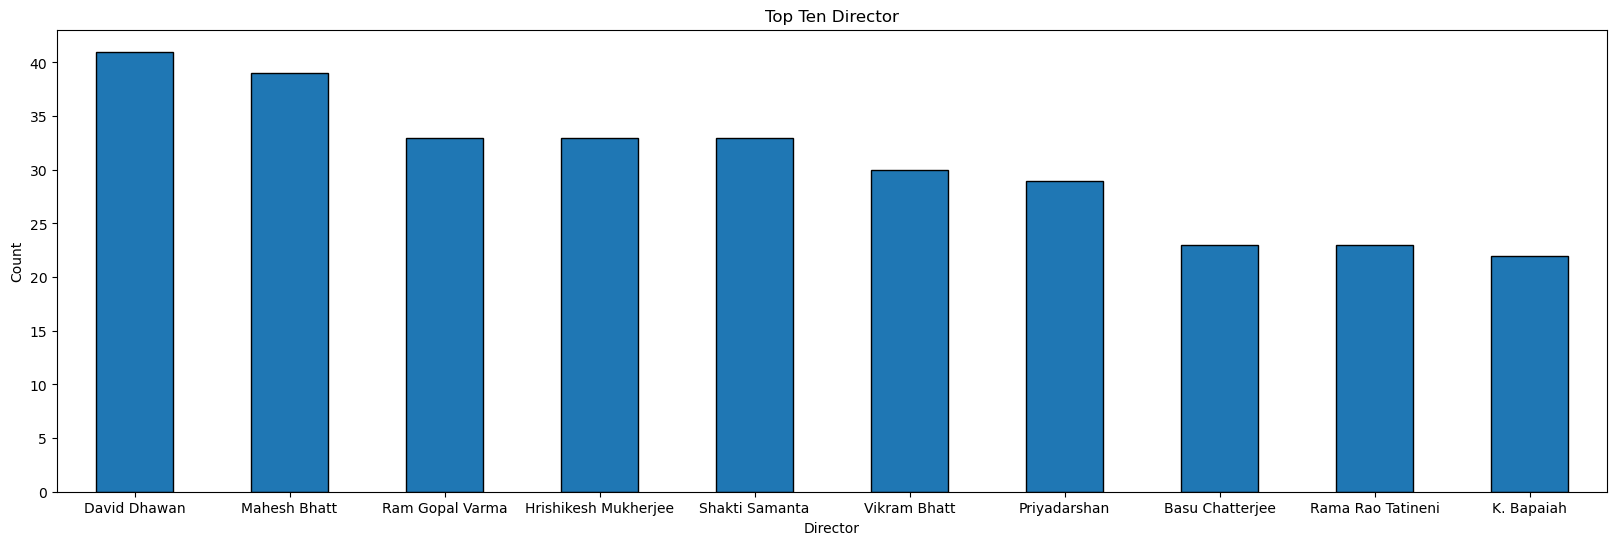

In [129]:
TopTenPlot("Director")

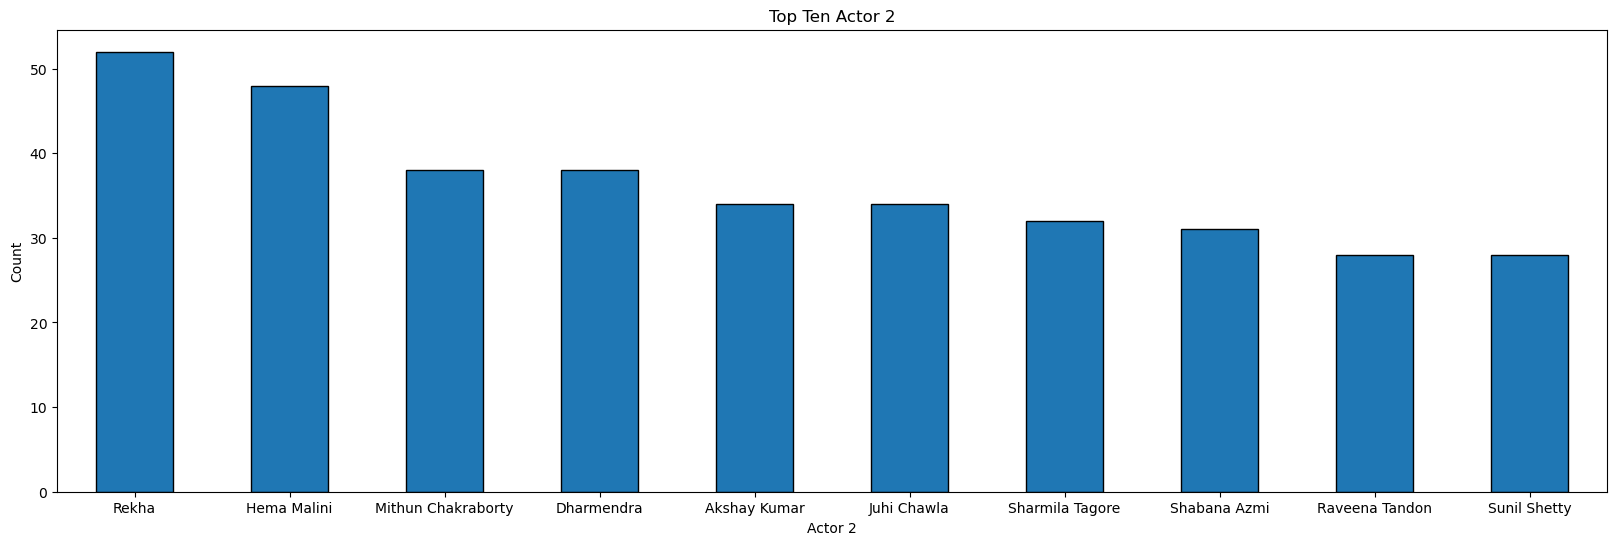

In [131]:
TopTenPlot("Actor 2")

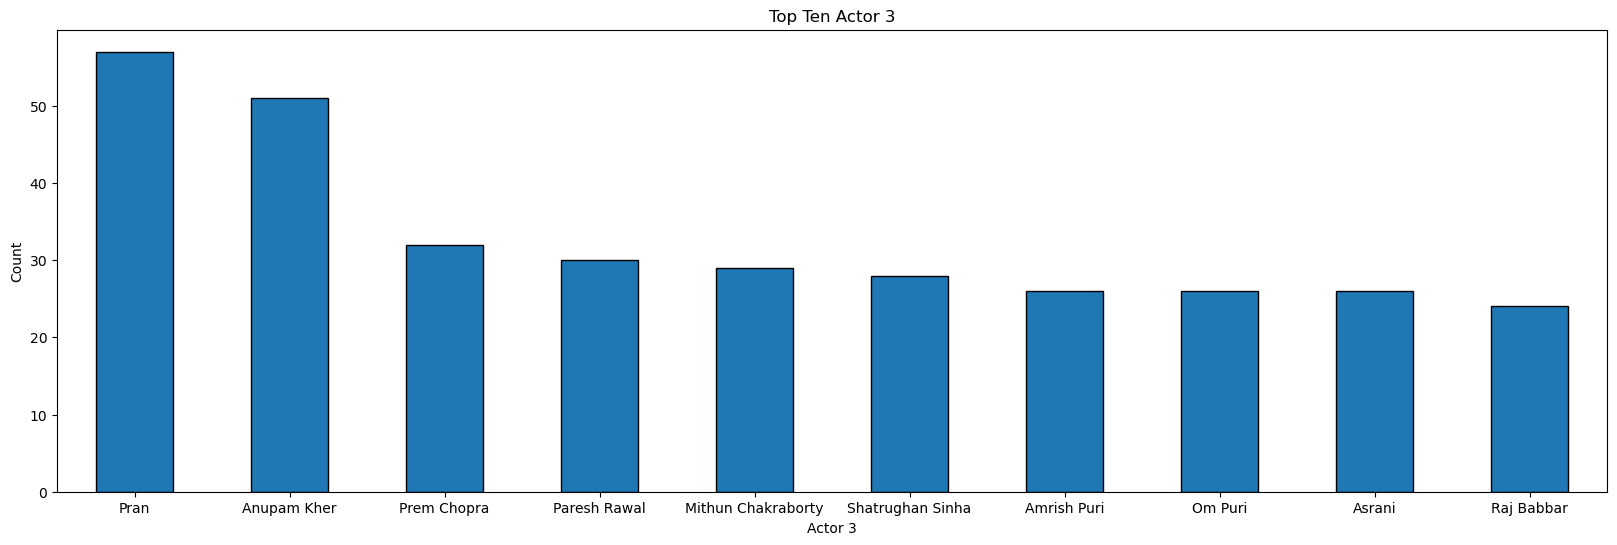

In [133]:
TopTenPlot("Actor 3")

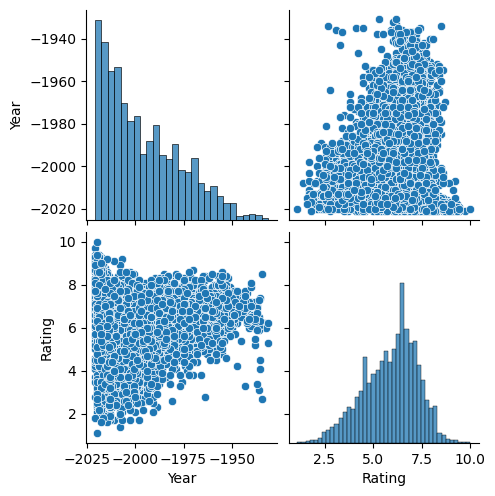

In [145]:
sns.pairplot(movie)
numeric_columns = movie.select_dtypes(include=['float64','int64']).columns
coreelation_matrix = movie[numeric_columns].corr(method='spearman')

CONCLUSION

In conclusion, this project provides valuable insights and a predictive model for movie rating prediction. 
The film industry can benefit from these findings to make data-driven decisions regarding movie production, casting, and marketing.
The most influential factors identified are the year of release, the number of votes, and movie duration.